In [3]:
cd data/

/global/u2/d/dorislee/astroSim-tutorial/data


In [7]:
%pylab inline
import yt 
yt.mylog.setLevel(50) #suppress yt outputs 

Populating the interactive namespace from numpy and matplotlib


In [4]:
ls 

mhd_sphere_hdf5_chk_0158  sphere_hdf5_chk_0494


## Exploratory Data Analysis

Loading in the dataset for the last timestep in our Rotating Sink Sphere simulation: 

In [8]:
ds = yt.load("sphere_hdf5_chk_0494")

By default, FLASH outputs its data in cgs (except in MHD..), so the code units in yt is actually in cgs.

In [53]:
print ds.length_unit,ds.mass_unit,ds.time_unit 

1.0 cm 1.0 g 1.0 s


Often useful information about a simulation timestep output: 
    

In [56]:
print "Current simulation timestep:", ds.current_time

Current simulation timestep: 4.94073212769e+12 code_time


Here is a list of variables that are stored in the simulation outputs, note that some variables (e.g mag) will not have data (since this is a hydro run):

In [52]:
print map(lambda x:str(x[1]),filter(lambda x :x[0]=='flash',ds.field_list))

['dens', 'divb', 'eint', 'ener', 'gamc', 'game', 'gpol', 'gpot', 'grac', 'magp', 'magx', 'magy', 'magz', 'pden', 'pres', 'sgax', 'sgay', 'sgaz', 'sgxo', 'sgyo', 'sgzo', 'shok', 'temp', 'velx', 'vely', 'velz']


This is just a demo of the long list of variables that yt can derive from the few variables stored in the simulation as shown above:

In [35]:
print map(lambda x: x[1],ds.field_info.keys())[:15]

['particle_position_cylindrical_z', 'cylindrical_theta', 'particle_angular_momentum_z', u'game', 'particle_radius', u'divb', 'total_energy', 'particle_position_cylindrical_radius', 'density_gradient_magnitude', 'particle_cylindrical_velocity_theta', 'pressure', 'particle_velocity_z', 'particle_position_spherical_radius', 'magnetic_field_strength', 'io_nn_velocity_x']


# SlicePlots

We many things we can do on the yt dataset ``ds``, such as making SlicePlots, create a volumetric rendering, or making radial profiles by cutting through the simulation box.

Here we make a SlicePlot of the density through the z direction


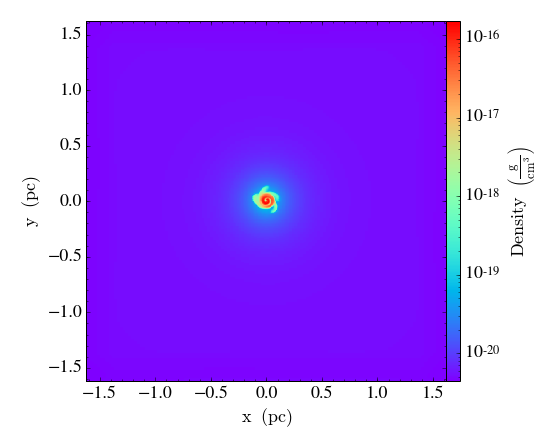

In [59]:
slc = yt.SlicePlot(ds, "z","density")
slc.set_figure_size(5) #sets the size of the plot
slc.set_cmap("all","rainbow")

We can plot what the AMR grid looks like. In this simulation, we are using Jean's criterion based AMR refinement, which means that ----- covered by --- .  The AMR structure would look quite different if we used density based refinement (which looks at the $\Nabla \rho$ across cell to cell) 
Note that the grid lines that yt is drawing denotes where the __box__ , remeber that 


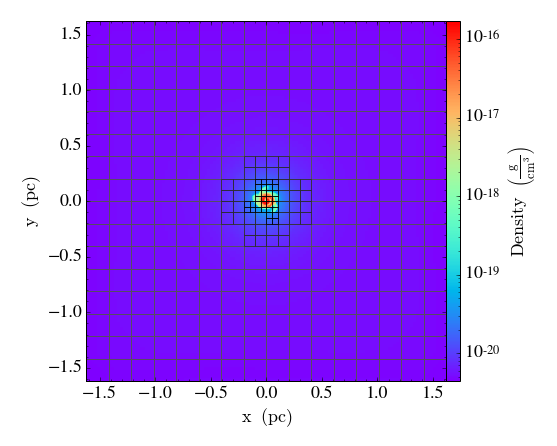

In [67]:
slc.annotate_grids()

We can also do fancy things like zooming in and plotting the velocity vectors.


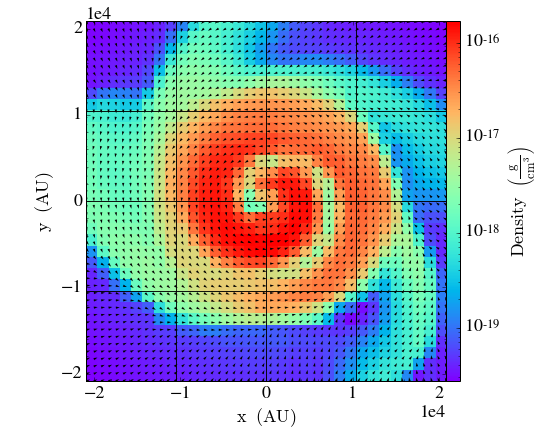

In [61]:
slc.zoom(4)
slc.annotate_grids()
slc.annotate_velocity(normalize=True)

zlim defines the limits on the colorbar for the variable that you are plotting.

In [ ]:
slc.set_zlim("density",zmin,zmax)

# Adding user-defined parameters

# FixedResolutionBuffer

In [ ]:
Inside, scripts/

For more information, refer to the excellent [yt documentation](http://yt-project.org/docs/3.2/) and [series of notebook tutorials](http://yt-project.org/docs/dev/quickstart/index.html) that is much more comprehensive than what is covered here.